In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import pathlib


color = sns.color_palette("coolwarm", as_cmap=True)
sns.set_theme(style="whitegrid")

# path for the number of trips data
data_trips = '/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/trips/2022'

# path for the number of filtered trips data
data_filtered_trips = '/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/filtered_trips'

# path to the destinations data
data_destinations = '/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/destinations'

# path for the filtered destinations data
data_filtered_destinations = '/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/filtered_destinations'

zipcode_file = pathlib.Path("/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/tl_2017_us_zcta510.zip")
# Check existence
if zipcode_file.exists():
    zipcode_gdf = gpd.read_file(f"zip://{zipcode_file}")
else:
    print("File not found! Make sure it's in the current directory.")

types = ['gender', 'household', 'married', 'nonfamily', 'family', 'race', 'trips']

In [40]:
def get_differences(df, df_filtered):
    """Calculate the differences between two DataFrames."""
    diff = df.copy()
    
    for type in types:
        if type in df.columns:
            diff[type] = df[type] - df_filtered[type]
    return diff

def plot_differences_destination(df, type, city):
    """
    Function to plot the heatmap of the social mixing index for the city's stations on a map

    Args:
        df (DataFrame): DataFrame with the indexes percentage (0-1)
        type (str): the type of index to plot
        city (str): the city name
    """

    # merge the two DataFrames
    merged = zipcode_gdf.merge(df, left_on='ZCTA5CE10', right_on='zipcode')
    
    merged.plot(column=type, legend=True, cmap=color, legend_kwds={'label': "Difference"}, missing_kwds={"color": "lightgrey"})
    
    if type == 'gender':
        type = 'age'
    plt.title(f'Differences for {city} (type: {type})')
    plt.show()

def plot_differences_trips(df, type, city):
    """
    Function to plot the heatmap of the social mixing index for the city's stations on a map

    Args:
        df (DataFrame): DataFrame with the indexes percentage (0-1)
        type (str): the type of index to plot
        city (str): the city name
    """

    # merge the two DataFrames
    merged_arrival = zipcode_gdf.merge(df, left_on='ZCTA5CE10', right_on='arrival')
    merged_arrival.plot(column=type, legend=True, cmap=color, legend_kwds={'label': "Difference"}, missing_kwds={"color": "lightgrey"})
    plt.title(f'Differences for {city} (type: arrival {type})')
    plt.show()

    merged_departure = zipcode_gdf.merge(df, left_on='ZCTA5CE10', right_on='departure')
    merged_departure.plot(column=type, legend=True, cmap=color, legend_kwds={'label': "Difference"}, missing_kwds={"color": "lightgrey"})
    plt.title(f'Differences for {city} (type: departure {type})')
    plt.show()

  departure arrival    trips     ratio
0     02115   02142   1070.0  0.029589
1     02115   02115   9679.0  0.181777
2     02115   02119    780.0  0.017623
3     02115   02215   6786.0  0.125426
4     02115   02120  13595.0  0.064717


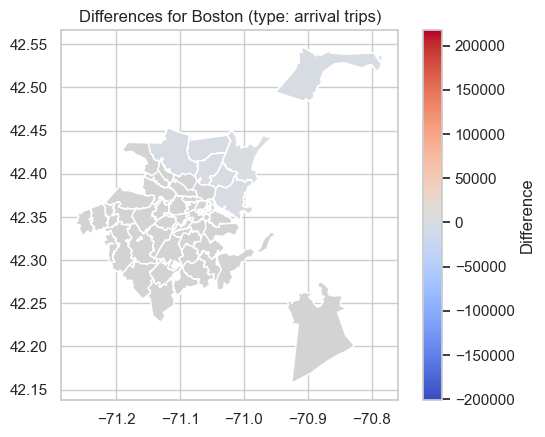

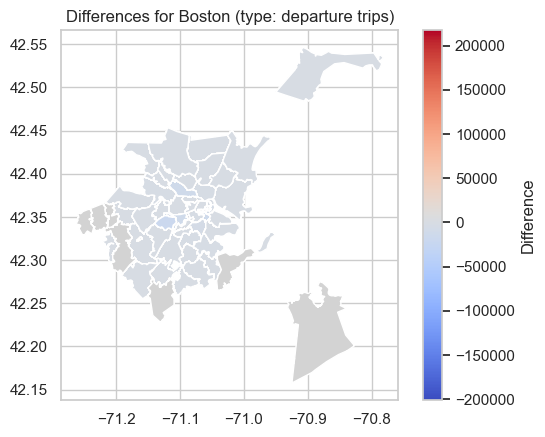

In [38]:
city = 'Boston'
type = 'trips'

# Load the datasets
df_trips = pd.read_csv(f'{data_trips}/{city}.csv', encoding='cp1252', dtype={'arrival': str, 'departure': str})
df_filtered_trips = pd.read_csv(f'{data_filtered_trips}/{city}.csv', encoding='cp1252', dtype={'arrival': str, 'departure': str})

# Calculate differences
diff_trips = get_differences(df_trips, df_filtered_trips)

print(diff_trips.head())
# Plot differences
plot_differences_trips(diff_trips, type, city)

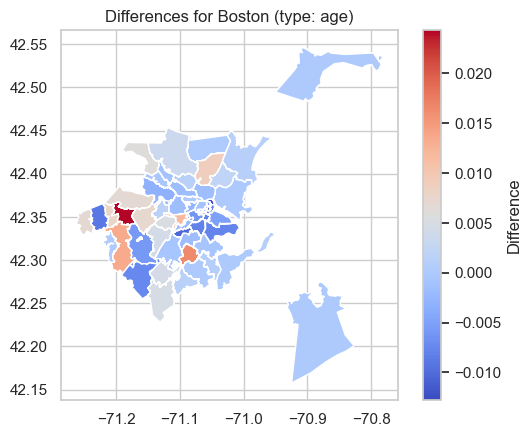

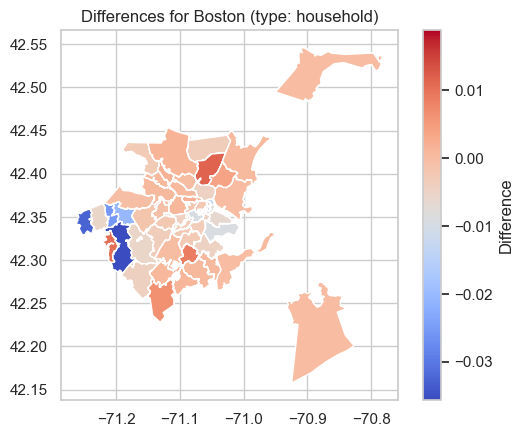

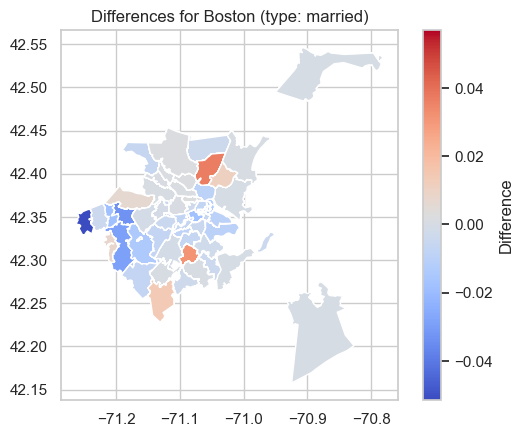

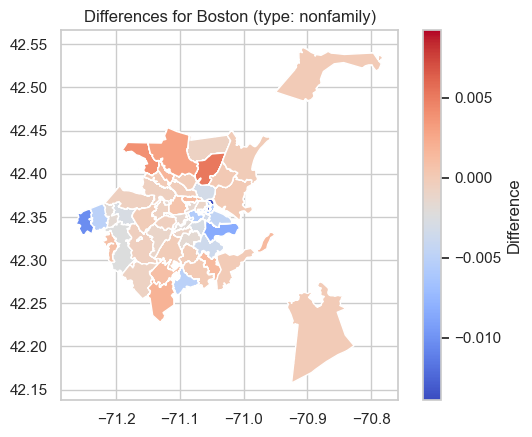

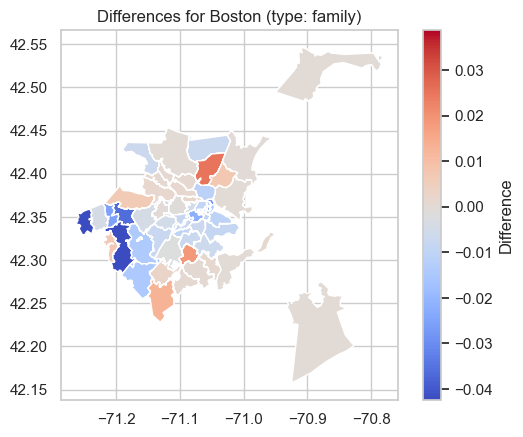

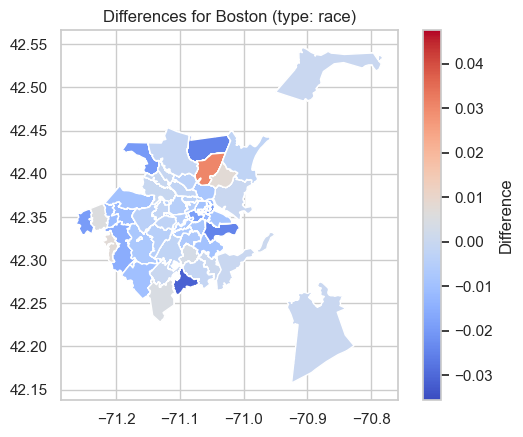

In [41]:
df_destinations = pd.read_csv(f'{data_destinations}/{city}.csv', encoding='cp1252', dtype={'zipcode': str})
df_filtered_destinations = pd.read_csv(f'{data_filtered_destinations}/{city}.csv', encoding='cp1252', dtype={'zipcode': str})

for type in types:
    if type == 'trips':
        continue
    # Calculate differences
    diff_destinations = get_differences(df_destinations, df_filtered_destinations)
    # Plot differences
    plot_differences_destination(diff_destinations, type, city)